In [1]:
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use(['seaborn-whitegrid'])
plt.rcParams['font.family'] = 'Malgun Gothic'
%config InlineBackend.figure_format = 'retina'

In [2]:
def string_to_numeric(d):
    d = d.replace(',','')
    return int(d)

In [3]:
df = pd.read_csv('./data/광역지자체 관광지출액_20210621.csv', header=1)

In [4]:
new_header = [str(j)+'-'+str(i).zfill(2) for j in range(2019,2021) for i in range(1,13) ]+[str(2021)+'-'+str(i).zfill(2)  for i in range(1,6) ]

In [5]:
sido_list = df['지역'].unique()
sido_list

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [6]:
df.columns = ['지역','구분']+new_header

In [ ]:
# 숫자 변환
df[new_header] = df[new_header].applymap(string_to_numeric)

In [ ]:
plt.rcParams['font.family'] = 'Malgun Gothic'
%config InlineBackend.figure_format = 'retina'
fig, ax = plt.subplots(6,3)

row, col =0,0
    
for i,isido in enumerate(sido_list):
    df[(df['지역']==isido)&(df['구분']=='총소비')].plot.bar(figsize=(15,10), 
                                                     legend=False, 
                                                     title=isido+"=총소비", ax=ax[row][col], 
                                                    )
    col+=1
    if col==3:
        col=0
        row+=1

plt.savefig('./results/all_consume.png', dpi=100)

In [1]:
%%html
<img src="./results/all_consume.png" />

In [ ]:
fig, ax = plt.subplots(6,3)

row, col =0,0
for i,isido in enumerate(sido_list):
    df[(df['지역']==isido)&(df['구분']=='숙박업')].plot.bar(figsize=(15,10), 
                                                     legend=False, 
                                                     title=isido+"=숙박업",  ax=ax[row][col]
                                                    )
    col+=1
    if col==3:
        col=0
        row+=1
plt.savefig('./results/lodging_consume.png', dpi=100)

In [2]:
%%html
<img src="./results/lodging_consume.png" />

### 전국 여행업은 다 죽었다, 서울이 특히 > 외국인 
#### 제주도의 경우에 2020년 동기 기준 오름

In [3]:
%%html
<img src="./results/travel_consume.png" />

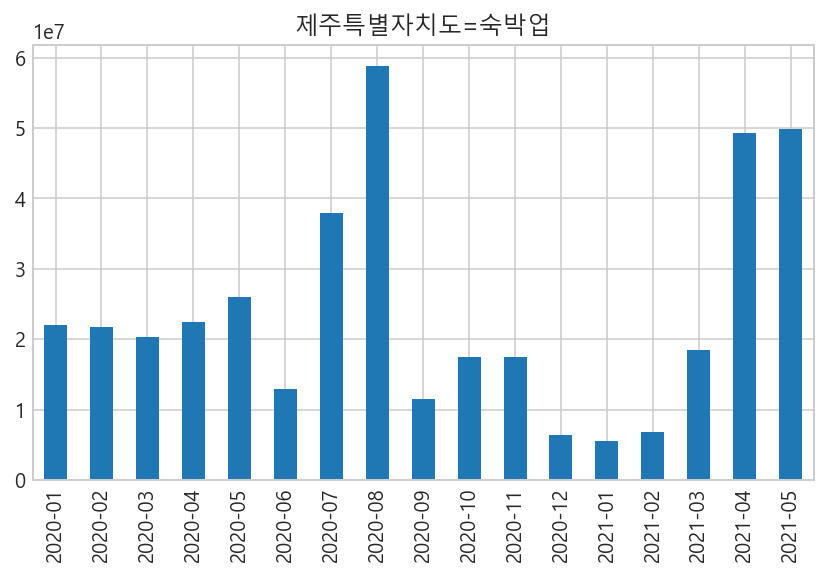

In [12]:
df[(df['지역']=='제주특별자치도')&(df['구분']=='여행업')][df.columns[14:]].T.plot.bar(figsize=(7,4), 
                                                         legend=False, 
                                                         title=isido+"=숙박업"
                                                        )
# 4월 5월 동기기준 여행업 소비가 많아짐

## 전국 렌터카 지출이 증가 > 경기도

In [ ]:
fig, ax = plt.subplots(6,3)

row, col =0,0
for i,isido in enumerate(sido_list):
    try:
        df[(df['지역']==isido)&(df['구분']=='렌터카')].plot.bar(figsize=(15,15), 
                                                         legend=False, 
                                                         title=isido+"=렌터카",  ax=ax[row][col]
                                                        )
    except Exception:
        pass
    col+=1
    if col==3:
        col=0
        row+=1
plt.savefig('./results/rentcar_consume.png', dpi=100)

In [4]:
%%html
<img src="./results/rentcar_consume.png" />

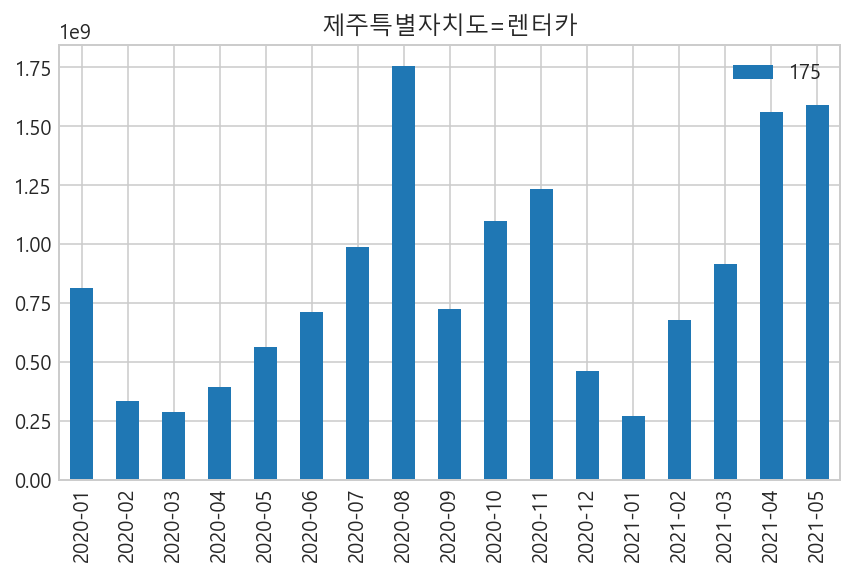

In [14]:
# 제주도 렌터카 관광이 작년 동기대비 증가
df[(df['지역']=='제주특별자치도')&(df['구분']=='렌터카')][df.columns[14:]].T.plot.bar(figsize=(7,4), 
                                                 legend=True, 
                                                 title=isido+"=렌터카", 
                                                )



In [ ]:
fig, ax = plt.subplots(6,3)

row, col =0,0
for i,isido in enumerate(sido_list):
    try:
        df[(df['지역']==isido)&(df['구분']=='레저스포츠')][df.columns[14:]].plot.bar(figsize=(15,15), 
                                                         legend=False, 
                                                         title=isido+"=레저스포츠",  ax=ax[row][col]
                                                        )
    except Exception:
        pass
    col+=1
    if col==3:
        col=0
        row+=1
plt.savefig('./results/leisure_consume.png', dpi=100)

In [5]:
%%html
<img src="./results/leisure_consume.png" />

In [ ]:
fig, ax = plt.subplots(6,3)

row, col =0,0
for i,isido in enumerate(sido_list):
    try:
        df[(df['지역']==isido)&(df['구분']=='문화서비스')].plot.bar(figsize=(15,10), 
                                                         legend=False, 
                                                         title=isido+"=문화서비스",  ax=ax[row][col]
                                                        )
    except Exception:
        pass
    col+=1
    if col==3:
        col=0
        row+=1
plt.savefig('./results/culture_service_consume.png', dpi=100)

In [6]:
%%html
<img src="./results/culture_service_consume.png" />